<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 
1) Data Size : The ratio of data size between the two sets of train/validation is 80:20 while the featuers are the same. The reason we have two datasets is to evaluate the how an increase in data size affects the model accuracy since more cases will be covered in the 2nd test/valid sets

2) Balance : The ratio of yes:no in the train1 and valid 1 is arond 50:50 whereas in the test 2 & valid 2 the ratio of yes:no is around 12:88

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Features with continuous numeric values were identified using dtypes function and have been normalized. The list of continuous features that underwent normalization are :Age, Balance, Duration, Day, Campaign, pdays, previous. Day has been chosen as an interget since customers generally get salaries at the start of the month and as the month progresses they become more conservative with thier expenditure. 

2.   Categorical variables were identified using dtypes function and I have used get_dummies function to perform One-hot coding, columns : Job, marital, Eduction, Default, Housing, Loan, Contact, Month, poutcome and y

3.   There are no null values in any of the datasets. However, the variable pdays has ~80% its value as -1, this value represents that ~80% of the data in that column is missing. Hence i will be removing that column from the analysis since treating it with either the mean/extreme values will lead to a lot skew in that data.


In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    X_norm = X
    X_norm=X_norm.astype(float)
    mu=X.agg('mean')
    sigma=(X.agg('var')) ** 0.5
    X_norm=(X-mu)/sigma 

    return X_norm

In [3]:
# PROBLEM 1, TASK 1 CODE GOES HERE

##Input all necessary data
train1=pd.read_csv("D:/Sem 1 IU My Stuff/AML/AML Assignment 2/train_1.csv")
train2=pd.read_csv("D:/Sem 1 IU My Stuff/AML/AML Assignment 2/train_2.csv")
valid1=pd.read_csv("D:/Sem 1 IU My Stuff/AML/AML Assignment 2/valid_1.csv")
valid2=pd.read_csv("D:/Sem 1 IU My Stuff/AML/AML Assignment 2/valid_2.csv")
test=pd.read_csv("D:/Sem 1 IU My Stuff/AML/AML Assignment 2/test.csv")


## Preprocessing the input data 
def preprocessing(data):
    ##data.loc[data['previous']==0,'pdays']=999
    data=data.drop(columns=['pdays'])
    data1_int=data.loc[:, data.dtypes == 'int64']
    data1_int_nor= feature_normalization(data1_int)
    data1_fac=data.loc[:, data.dtypes == 'object']
    data1_fac2=pd.get_dummies(data1_fac)
    data1_nor_full = pd.concat([data1_int_nor,data1_fac2], axis=1)
    return data1_nor_full

## Treating the data 
train1_processed=preprocessing(train1)
valid1_processed=preprocessing(valid1)
train2_processed=preprocessing(train2)
valid2_processed=preprocessing(valid2)
test_processed=preprocessing(test)

In [4]:
###Subdivision 3
##No missing data 

print("Presence of NULL values in the dataset")
print(train1_processed.isnull().values.any())
print(valid1_processed.isnull().values.any())
print(train2_processed.isnull().values.any())
print(valid2_processed.isnull().values.any())
print(test_processed.isnull().values.any())

Presence of NULL values in the dataset
False
False
False
False
False


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

The model with the highest accuracy for the validation dataset has the lambda value 16.666666666666668
The accuracy of the validation dataset for the above Lamda value= 0.8186650915534555
The accuracy of the Training dataset for the above Lambda value= 0.8326192938395627
The accuracy of the test dataset for the above Lambda value= 0.7611412141988279


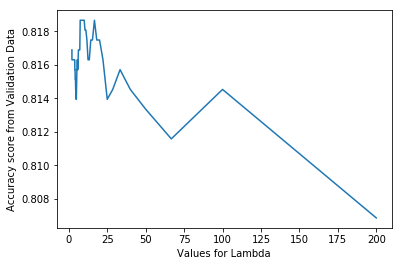

In [5]:
# PROBLEM 1, TASK 2 CODE GOES HERE
C_value = np.arange(0.005,0.5,0.005)
Lambda_value=[]
Lamda_accuracy=[]

for i in C_value:
    clf = LogisticRegression(fit_intercept=True,C=i)
    clf.fit(train1_processed.iloc[:,:50], train1_processed.iloc[:,-1])
    accuracy=clf.score(valid1_processed.iloc[:,:50], valid1_processed.iloc[:,-1])
    Lambda_value.append(1/i)
    Lamda_accuracy.append(accuracy)

ind = np.argmax(Lamda_accuracy)
print("The model with the highest accuracy for the validation dataset has the lambda value", Lambda_value[ind])

print("The accuracy of the validation dataset for the above Lamda value=",Lamda_accuracy[ind])
clf = LogisticRegression(fit_intercept=True,C=Lambda_value[ind])
clf.fit(train1_processed.iloc[:,:50], train1_processed.iloc[:,-1])
print("The accuracy of the Training dataset for the above Lambda value=",clf.score(train1_processed.iloc[:,:50], train1_processed.iloc[:,-1]))
print("The accuracy of the test dataset for the above Lambda value=",clf.score(test_processed.iloc[:,:50], test_processed.iloc[:,-1]))

##Test and training model for the 

plt.plot(Lambda_value,Lamda_accuracy)
plt.xlabel("Values for Lambda")
plt.ylabel("Accuracy score from Validation Data")
plt.show()

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

The model with the maximum accuracy for the validation dataset has the lambda value 4.444444444444445
The accuracy of the validation dataset for the above Lambda value= 0.9011611833010782
The accuracy of the Training dataset for the above Lambda value= 0.9026750535701943
The accuracy of the test dataset for the above Lambda value= 0.9019130819418335


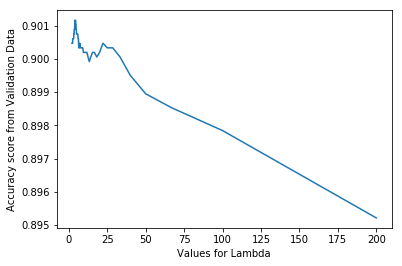

In [6]:
# PROBLEM 1, TASK 3 CODE GOES HERE
x = np.arange(0.005,0.5,0.005)
C_value=[]
C_accuracy=[]
for i in x:
    clf = LogisticRegression(fit_intercept=True,C=i)
    clf.fit(train2_processed.iloc[:,:50], train2_processed.iloc[:,-1])
    accuracy=clf.score(valid2_processed.iloc[:,:50], valid2_processed.iloc[:,-1])
    C_value.append(1/i)
    C_accuracy.append(accuracy)

ind = np.argmax(C_accuracy)
print("The model with the maximum accuracy for the validation dataset has the lambda value", C_value[ind])

print("The accuracy of the validation dataset for the above Lambda value=",C_accuracy[ind])
clf = LogisticRegression(fit_intercept=True,C=C_value[ind])
clf.fit(train2_processed.iloc[:,:50], train2_processed.iloc[:,-1])
print("The accuracy of the Training dataset for the above Lambda value=",clf.score(train2_processed.iloc[:,:50], train2_processed.iloc[:,-1]))
print("The accuracy of the test dataset for the above Lambda value=",clf.score(test_processed.iloc[:,:50], test_processed.iloc[:,-1]))

plt.plot(C_value,C_accuracy)
plt.xlabel("Values for Lambda")
plt.ylabel("Accuracy score from Validation Data")
plt.show()

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

In [7]:
# PROBLEM 1, TASK 4 CODE GOES HERE
x = np.arange(0.005,0.5,0.005)
C_value=[]
C_accuracy=[]
Theta_value=[]
for i in x:
    clf = LogisticRegression(fit_intercept=True,C=i)
    clf.fit(train2_processed.iloc[:,:50], train2_processed.iloc[:,-1])
    pred=clf.predict_proba(valid2_processed.iloc[:,:50])[:,1]
    l2 = np.arange(0.1, 0.9, 0.1)
    for j in l2:
        k=np.where(pred <= j, 0, 1)
        accuracy=sum(k==valid2_processed.iloc[:,-1])/len(k)
        C_accuracy.append(accuracy)
        C_value.append(1/i)
        Theta_value.append(j)

Final_Accuracy_all_Combo = pd.DataFrame({'C_Value': C_value,'Theta_value': Theta_value,'Accuracy': C_accuracy})

Max_accuracy=Final_Accuracy_all_Combo["Accuracy"].values.argmax()
###print(Max_accuracy)
Validation_set_accuracy_max=Final_Accuracy_all_Combo.iloc[Max_accuracy]["Accuracy"]
Best_C_value=Final_Accuracy_all_Combo.iloc[Max_accuracy]["C_Value"]
Best_Theta_value=Final_Accuracy_all_Combo.iloc[Max_accuracy]["Theta_value"]

print("The model with the maximum accuracy for the validation dataset has the lambda value", Best_C_value)
print("The model with the maximum accuracy has the validation dataset has the Threshold value", Best_Theta_value)

print("The accuracy of the validation dataset for the above combination of Lambda & Threshold has the value=",Validation_set_accuracy_max)
clf = LogisticRegression(fit_intercept=True,C=Best_C_value)
clf.fit(train2_processed.iloc[:,:50], train2_processed.iloc[:,-1])

pred=clf.predict_proba(valid2_processed.iloc[:,:50])[:,1]
k=np.where(pred <= Best_Theta_value, 0, 1)
accuracy=sum(k==valid2_processed.iloc[:,-1])/len(k)

print("The accuracy of the Training dataset for the above combination of Lambda & Threshold value=",accuracy)

pred=clf.predict_proba(test_processed.iloc[:,:50])[:,1]
k=np.where(pred <= Best_Theta_value, 0, 1)
accuracy=sum(k==test_processed.iloc[:,-1])/len(k)

print("The accuracy of the test dataset for the above combination of Lambda & Threshold has the value=",accuracy)

##Table

Final_Accuracy_all_Combo.columns=['Lambda','Threshold','Accuracy']
print('/n')
print("Variation in validation accuracy for across different Theta Groups, same set of Lambda value has been applied for each Threshold value")
agg=Final_Accuracy_all_Combo.groupby('Threshold')['Accuracy'].agg([pd.np.min, pd.np.max, pd.np.mean])
print(agg)

print('/n')
print("The results from iterating the Lambda and Threshold value on the validation dataset sorted by accuracy")

print(Final_Accuracy_all_Combo.sort_values('Accuracy', ascending=False))

The model with the maximum accuracy for the validation dataset has the lambda value 40.0
The model with the maximum accuracy has the validation dataset has the Threshold value 0.4
The accuracy of the validation dataset for the above combination of Lambda & Threshold has the value= 0.9032347249101466
The accuracy of the Training dataset for the above combination of Lambda & Threshold value= 0.9033729610174177
The accuracy of the test dataset for the above combination of Lambda & Threshold has the value= 0.9046776512219397
/n
Variation in validation accuracy for across different Theta Groups, same set of Lambda value has been applied for each Threshold value
               amin      amax      mean
Threshold                              
0.1        0.772602  0.818358  0.815441
0.2        0.881393  0.888029  0.887325
0.3        0.898949  0.901576  0.901036
0.4        0.901161  0.903235  0.902444
0.5        0.895217  0.901161  0.900441
0.6        0.891623  0.899226  0.898708
0.7        0.88

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

|         | Train  | Validation | Test   |
|---------|--------|------------|--------|
| Model A | 83.26% | 81.86%     | 76.11% |
| Model B | 90.27% | 90.12%     | 90.19% |
| Model C | 90.34% | 90.32%     | 90.47% |

Model A: Model A is run with less amount of data and hence the accuracy is the lowest among A, B, C. The accuracy doenot change drastically by changing the value of Lambda in all 3 models when compared to the default lambda of 1, also it is observed that as lambda increases beyond the value of 10 the accuracy decreases. This indicates that the model is not overfit and this fact is also confirmed by the models' performance on the test data. 

Model B Vs C: A very minor increase can be observed by optimizing theta and lambda for model C, this is due to the fact that there is sufficient data in the training set. The default theta value of 0.5 works pretty well. 

Train Vs Validation Vs Test: In model 1 there is a lot of difference between train, test and validation accuracies.This is due to the low amount of data used to train Model 1. In Model B and C the values of test, train and validation only differ in the first decimal this indicates that the model is stable. The model A is following the expected behaviour where training data has the highest accuracy followed by the validation(since we are optiming the parameters based on Validation data) and then the test. 

2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

The accuracy metric is a good measure to start evaluating any type of regression/classification problem, for classification problems like the one above the accuracy score measures % prediction of values that are accurately classified. 
1) A model with a high accuracy for both train & test/valid data means that the model is performing well 
2) A model with a high accuracy for the train & low accuracy for test/valid data means that the model is overfitting and we would have perform regularization or reduce the number of parametrs 
3) A model with low accuracy for both the test and validation sets indicates that the model needs improvement, this could be done by adding more features or data or trying out a different model 

For logistic regression, a better way to analyse the model performance is to look at the confusion matrix. The specificity and sensitivity values are very useful to better understand the model performance by classes. For eg, if 99% of the data belongs to class 0, then in a dataset if all predict the class of 0 then our accuracy will be 99% this is the biggest problem with accuracy and could be solved by looking at the specificity and sensitivity


## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

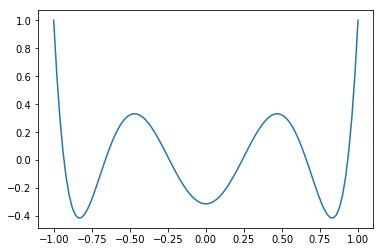

In [8]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x = np.linspace(low, high, 100)
    z=x
    x=pd.DataFrame(x)
    x.columns=['value']
    m=len(w)
    for i in range(m):
        x[i]=x['value'] ** i
    x = x.drop('value', 1)
    y=np.dot(x,w)
    plt.plot(z,y)
    

## TEST CASES (The following lines should plot a function)
#visualize_function(3, -1, 1)
#visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [9]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    data_size=n_train+n_test
    w = get_coefficients(degree)
    x = np.linspace(-1, 1, data_size)
    z=x
    x=pd.DataFrame(x)
    x.columns=['value']
    m=len(w)
    for i in range(m):
        x[i]=x['value'] ** i
    x = x.drop('value', 1)
    y=np.dot(x,w)
    normal=np.random.normal(0, sigma, data_size)
    y_new=y+normal
    y_new=pd.DataFrame(y_new)
    data_final=pd.concat([x, y_new], axis=1)
    ratio=n_train/data_size
    msk=np.random.rand(len(data_final))<ratio
    
    train = data_final[msk]
    test = data_final[~msk]
    X_train=train.iloc[:,1]
    X_train=X_train.values
    y_train=train.iloc[:,-1]
    y_train=y_train.values
    X_test=test.iloc[:,1]
    X_test=X_test.values
    y_test=test.iloc[:,-1]
    y_test=y_test.values

    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 Quadratic Vs Degree 10 model :The results show that the quadratic model is more stable than the degree 10 model interms of prediction accuracy over the test dataset. This is as expected because the model with degree 10 will overfit the data since there is no regulaization taking place to control it. Also since the number of features in the quadratic model is less there is less chance of overfitting.  
 
 Test Accuracy for degree 10 model : The test set accuracy of the degree 10 model is better than the test accuracy from the quadratic model as expected since the degree 10 model has more features to learn extract information. 
 
 Test Vs Validation : 
 a) Degree 10 model : In degree 10 model the accuracy of the test set is much better than the validation due to the problem of overfitting
 b) Quadtatic Model : In the quadratic model since the data size is very low there is a lot of randomness and not much could be concluded from the test and validation accuracy, generally the test accuracy is much better than the validation accuracy
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

                    Training Error  Testing Error
0  Quadratic Model        0.057108       0.192133
1  Degree 10 Model        0.015973     199.925667


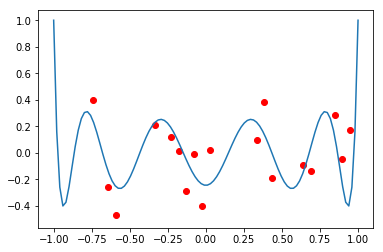

In [46]:
X_train, y_train, X_test, y_test=generate_dataset(10, 20, 20, 0.2)

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)
visualize_function(10, -1, 1)

X_train.columns=['value']
X_test.columns=['value']
plt.scatter(X_train,y_train,color='r')

### Creating the test and train set with all necessary columns 
for i in range(11):
    X_train[i]=X_train['value'] ** i

X_train = X_train.drop('value', 1)
    
for i in range(11):
    X_test[i]=X_test['value'] ** i

X_test = X_test.drop('value', 1)
X_train.columns=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X_test.columns=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

##Model A
LR_quad = linear_model.LinearRegression()
LR_quad.fit(X_train.iloc[:,:3], y_train)

y_pred = LR_quad.predict(X_train.iloc[:,:3])
MSE_quad_train=mean_squared_error(y_train, y_pred)

y_pred = LR_quad.predict(X_test.iloc[:,:3])
MSE_quad_test=mean_squared_error(y_test, y_pred)


##Model B
LR_pow = linear_model.LinearRegression()
LR_pow.fit(X_train, y_train)

y_pred = LR_pow.predict(X_train)
MSE_high_pow_train=mean_squared_error(y_train, y_pred)

y_pred = LR_pow.predict(X_test)
MSE_high_pow_test=mean_squared_error(y_test, y_pred)


A = [['Quadratic Model',MSE_quad_train,MSE_quad_test],['Degree 10 Model',MSE_high_pow_train,MSE_high_pow_test]]
A=pd.DataFrame(A)
A.columns=['  ','Training Error','Testing Error']
print(A)


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.


 Overall performance: Both the models are performing very poorly since both the number of features and the data size is pretty small, we can improve the accuracy by accounting for these issues. 
 
 Quadratic Vs degree 10: The degree 10 model is performing better than the quadratic model in terms of both the train & Train data since it has more features to extract data from and there is no overfitting happening.   
 
 Test Vs Validation: In degree 10 model the accuracy of the train set is much better than the test due to the problem of overfitting


**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

                    Training Error  Testing Error
0  Quadratic Model    54574.783729   2.441719e+09
1  Degree 10 Model        1.161031   2.203230e+09


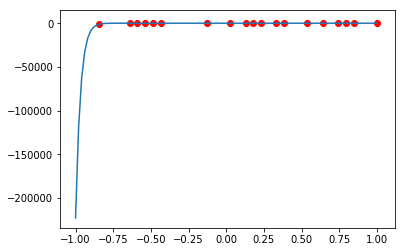

In [51]:
X_train, y_train, X_test, y_test=generate_dataset(45, 20, 20, 0)

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)
visualize_function(45, -1, 1)

X_train.columns=['value']
X_test.columns=['value']
plt.scatter(X_train,y_train,color='r')

for i in range(11):
    X_train[i]=X_train['value'] ** i

X_train = X_train.drop('value', 1)
    
for i in range(11):
    X_test[i]=X_test['value'] ** i

X_test = X_test.drop('value', 1)
X_train.columns=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X_test.columns=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

##Model A
LR_quad = linear_model.LinearRegression()
LR_quad.fit(X_train.iloc[:,:3], y_train)

y_pred = LR_quad.predict(X_train.iloc[:,:3])
MSE_quad_train=mean_squared_error(y_train, y_pred)

y_pred = LR_quad.predict(X_test.iloc[:,:3])
MSE_quad_test=mean_squared_error(y_test, y_pred)


##Model B
LR_pow = linear_model.LinearRegression()
LR_pow.fit(X_train.iloc[:,:11], y_train)

y_pred = LR_pow.predict(X_train.iloc[:,:11])
MSE_high_pow_train=mean_squared_error(y_train, y_pred)

y_pred = LR_pow.predict(X_test.iloc[:,:11])
MSE_high_pow_test=mean_squared_error(y_test, y_pred)

A = [['Quadratic Model',MSE_quad_train,MSE_quad_test],['Degree 10 Model',MSE_high_pow_train,MSE_high_pow_test]]
A=pd.DataFrame(A)
A.columns=['  ','Training Error','Testing Error']
print(A)
